In [80]:
#Dataset link
#https://drive.google.com/file/d/1cCkwiVv4mgfl20ntgY3n4yApcWqqZQe6/view

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Importing Dataset

In [3]:
movies_data = pd.read_csv('updated_movie.csv')
movies_data.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,631842,Knock at the Cabin,Horror-Mystery-Thriller,en,While vacationing at a remote cabin a young gi...,3422.537,Blinding Edge Pictures-Universal Pictures-Film...,2023-02-01,20000000.0,52000000.0,100.0,Released,Save your family or save humanity. Make the ch...,6.457,888.0,Dave Bautista-Jonathan Groff-Ben Aldridge-Kris...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,/zWDMQX0sPaW2u0N2pJaYA8bVVaJ.jpg,1058949-646389-772515-505642-143970-667216-104...
1,646389,Plane,Action-Adventure-Thriller,en,After a heroic job of successfully landing his...,2618.646,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,2023-01-12,25000000.0,51000000.0,107.0,Released,Survive together or die alone.,6.901,785.0,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,/9Rq14Eyrf7Tu1xk0Pl7VcNbNh1n.jpg,505642-758769-864692-631842-1058949-925943-758...
2,315162,Puss in Boots: The Last Wish,Animation-Adventure-Comedy-Family,en,Puss in Boots discovers that his passion for a...,2589.341,DreamWorks Animation-Universal Pictures,2022-12-07,90000000.0,442000000.0,103.0,Released,Say hola to his little friends.,8.402,4357.0,Antonio Banderas-Salma Hayek-Harvey Guillén-Wa...,fairy tale-talking dog-spin off-aftercreditsst...,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,/b1Y8SUb12gPHCSSSNlbX4nB3IKy.jpg,536554-76600-816904-653851-899112-985335-83078...
3,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,2525.408,Marvel Studios,2022-11-09,250000000.0,858535561.0,162.0,Released,Forever.,7.338,3922.0,Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...,loss of loved one-hero-sequel-superhero-based ...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,/xDMIl84Qo5Tsu62c9DGWhmPI67A.jpg,436270-829280-76600-56969-312634-1037858-238-5...
4,956101,The Eighth Clause,Thriller,la,Kat and Borja appear to be a perfect couple bu...,2259.303,SDB Films-El Hombre Orquesta,2022-04-29,0.0,0.0,0.0,Released,NaN,4.600,10.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/8tc8eMFAX2SDC1TRu987qFQy8Cl.jpg,/kLnqNE9Af5QHyvUxw8cDGhF1ilv.jpg,NaN


In [4]:
movies_data.shape

(723013, 20)

<BarContainer object of 25 artists>

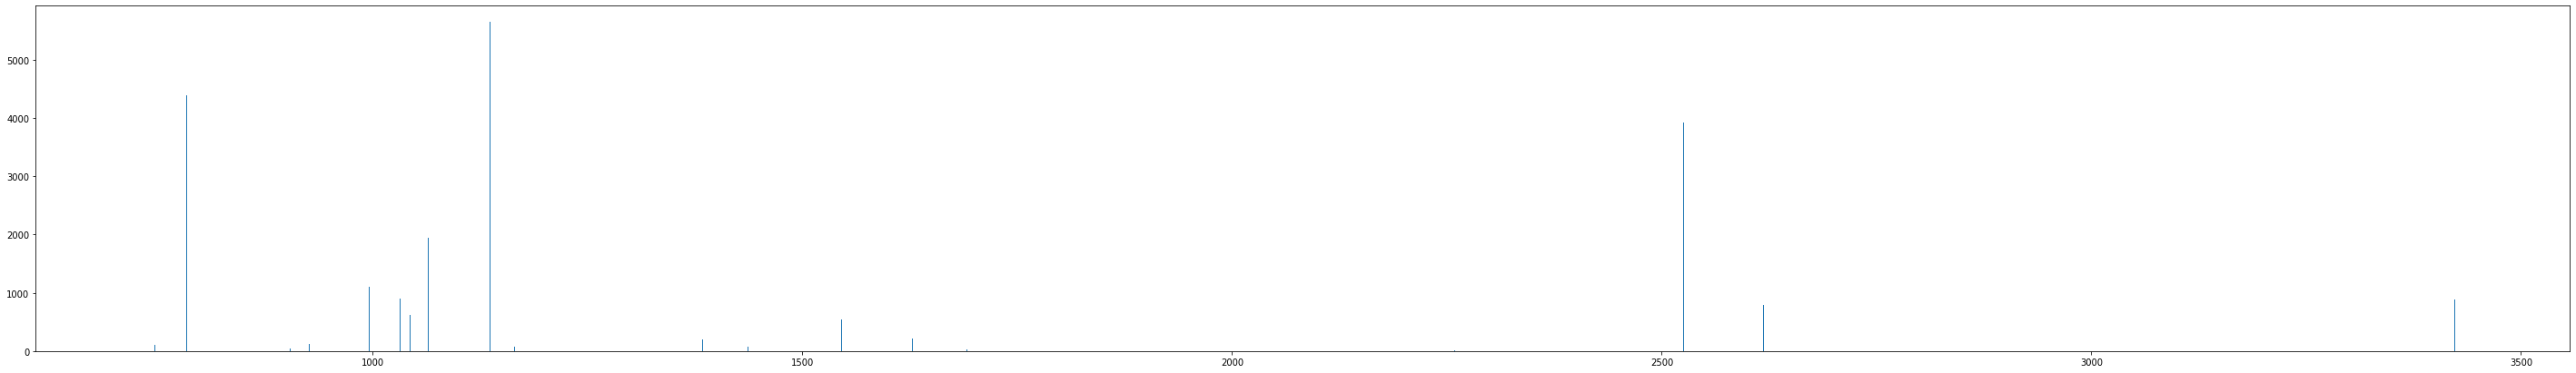

In [5]:
# Setting DataFrame
df = pd.DataFrame(movies_data)

# Setting the variables
x_axis = df['popularity']
y_axis = df['vote_count']

# Figure Size
from matplotlib import pyplot as plt
fig = plt.figure(figsize =(50, 7))

# Create bar graph, contingency table using any 2 features.
plt.bar(x_axis[:25], y_axis[:25])

<AxesSubplot:xlabel='popularity', ylabel='vote_count'>

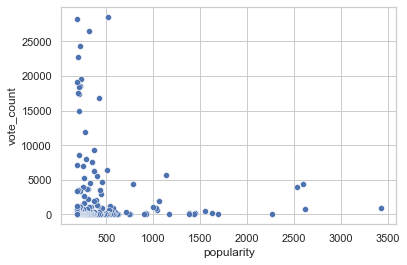

In [93]:
#Plot Scatter plot using seaborn.
sns.set(style='whitegrid')
x_axis = df['popularity'].head(200)
y_axis = df['vote_count'].head(200)
sns.scatterplot(x=x_axis, y=y_axis, data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1436.445'),
  Text(1, 0, '1440.505'),
  Text(2, 0, '1545.382'),
  Text(3, 0, '1627.738'),
  Text(4, 0, '1691.825'),
  Text(5, 0, '2259.303'),
  Text(6, 0, '2525.408'),
  Text(7, 0, '2589.341'),
  Text(8, 0, '2618.646'),
  Text(9, 0, '3422.537')])

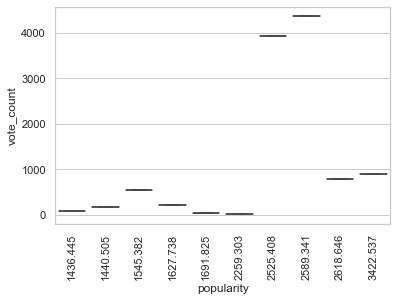

In [94]:
#Plot box plot using seaborn.
x_axis = df['popularity'].head(10)
y_axis = df['vote_count'].head(10)
sns.boxplot( y=y_axis, x=x_axis)
plt.xticks(rotation = 90)

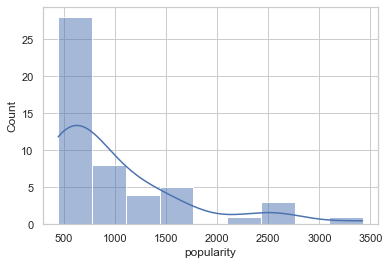

In [95]:
from matplotlib import pyplot as plt
sns.histplot(df['popularity'][:50],kde = True)
plt.show()

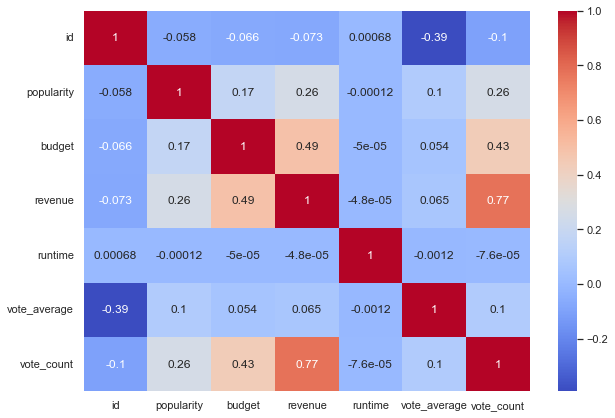

In [96]:
#Heatmap
sns.set(rc={"figure.figsize":(10,7)})
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [6]:
movies_data.shape

(723013, 20)

In [7]:
#id,title,overview,genres,keywords

In [8]:
movies = movies_data[['id','title','popularity','genres','production_companies','tagline','keywords','poster_path']]

In [9]:
movies.dropna(inplace=True)
movies.isnull().sum()
movies.duplicated().sum()
movies.drop_duplicates(inplace=True)
movies.shape

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\2908781970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\2908781970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop_duplicates(inplace=True)


(49722, 8)

In [10]:
movies.head()

,id,title,popularity,genres,production_companies,tagline,keywords,poster_path
0,631842,Knock at the Cabin,3422.537,Horror-Mystery-Thriller,Blinding Edge Pictures-Universal Pictures-Film...,Save your family or save humanity. Make the ch...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg
1,646389,Plane,2618.646,Action-Adventure-Thriller,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,Survive together or die alone.,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg
2,315162,Puss in Boots: The Last Wish,2589.341,Animation-Adventure-Comedy-Family,DreamWorks Animation-Universal Pictures,Say hola to his little friends.,fairy tale-talking dog-spin off-aftercreditsst...,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg
3,505642,Black Panther: Wakanda Forever,2525.408,Action-Adventure-Science Fiction,Marvel Studios,Forever.,loss of loved one-hero-sequel-superhero-based ...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg
6,677179,Creed III,1627.738,Drama-Action,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,You can't run from your past.,philadelphia pennsylvania-sequel-orphan-former...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg


In [11]:
movies.drop(index=movies.tail(34000).index, inplace=True)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\1824534365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop(index=movies.tail(34000).index, inplace=True)


In [12]:
movies.shape

(15722, 8)

In [13]:
#converting popularity to rating

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
movies['rating'] = scaler.fit_transform(movies[['popularity']])
movies.head()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\153181873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['rating'] = scaler.fit_transform(movies[['popularity']])


,id,title,popularity,genres,production_companies,tagline,keywords,poster_path,rating
0,631842,Knock at the Cabin,3422.537,Horror-Mystery-Thriller,Blinding Edge Pictures-Universal Pictures-Film...,Save your family or save humanity. Make the ch...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,5.000000
1,646389,Plane,2618.646,Action-Adventure-Thriller,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,Survive together or die alone.,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,4.058893
2,315162,Puss in Boots: The Last Wish,2589.341,Animation-Adventure-Comedy-Family,DreamWorks Animation-Universal Pictures,Say hola to his little friends.,fairy tale-talking dog-spin off-aftercreditsst...,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,4.024586
3,505642,Black Panther: Wakanda Forever,2525.408,Action-Adventure-Science Fiction,Marvel Studios,Forever.,loss of loved one-hero-sequel-superhero-based ...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.949740
6,677179,Creed III,1627.738,Drama-Action,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,You can't run from your past.,philadelphia pennsylvania-sequel-orphan-former...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,2.898847


In [74]:
import pickle

pickle.dump(movies,open('artifacts/cleaned_movies.pkl','wb'))

In [14]:
def split_genres(genre_string):
    return genre_string.split("-")

# Apply the function to the genres column
movies['genres'] = movies['genres'].apply(split_genres)
movies['production_companies'] = movies['production_companies'].apply(split_genres)
movies['keywords'] = movies['keywords'].apply(split_genres)


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\2075860557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(split_genres)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\2075860557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['production_companies'] = movies['production_companies'].apply(split_genres)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\2075860557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [15]:
# Define a function to split the tagline string into a list of words
def split_tagline(tagline_string):
    return tagline_string.split()

# Apply the function to the tagline column
movies['tagline'] = movies['tagline'].apply(split_tagline)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\1235512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tagline'] = movies['tagline'].apply(split_tagline)


In [16]:
movies.head()

,id,title,popularity,genres,production_companies,tagline,keywords,poster_path,rating
0,631842,Knock at the Cabin,3422.537,"[Horror, Mystery, Thriller]","[Blinding Edge Pictures, Universal Pictures, F...","[Save, your, family, or, save, humanity., Make...","[based on novel or book, sacrifice, cabin, fai...",/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,5.000000
1,646389,Plane,2618.646,"[Action, Adventure, Thriller]","[MadRiver Pictures, Di Bonaventura Pictures, G...","[Survive, together, or, die, alone.]","[pilot, airplane, philippines, held hostage, p...",/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,4.058893
2,315162,Puss in Boots: The Last Wish,2589.341,"[Animation, Adventure, Comedy, Family]","[DreamWorks Animation, Universal Pictures]","[Say, hola, to, his, little, friends.]","[fairy tale, talking dog, spin off, aftercredi...",/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,4.024586
3,505642,Black Panther: Wakanda Forever,2525.408,"[Action, Adventure, Science Fiction]",[Marvel Studios],[Forever.],"[loss of loved one, hero, sequel, superhero, b...",/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.949740
6,677179,Creed III,1627.738,"[Drama, Action]","[Metro, Goldwyn, Mayer, Proximity Media, Balbo...","[You, can't, run, from, your, past.]","[philadelphia pennsylvania, sequel, orphan, fo...",/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,2.898847


In [17]:
def remove_space(word):
    l=[]
    for i in word:
        l.append(i.replace(" ",""))
    return l

In [18]:
movies['genres'] = movies['genres'].apply(remove_space)
movies['production_companies'] = movies['production_companies'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)
movies['tagline'] = movies['tagline'].apply(remove_space)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\3681893778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(remove_space)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\3681893778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['production_companies'] = movies['production_companies'].apply(remove_space)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_10176\3681893778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [19]:
movies.head()

,id,title,popularity,genres,production_companies,tagline,keywords,poster_path,rating
0,631842,Knock at the Cabin,3422.537,"[Horror, Mystery, Thriller]","[BlindingEdgePictures, UniversalPictures, Film...","[Save, your, family, or, save, humanity., Make...","[basedonnovelorbook, sacrifice, cabin, faith, ...",/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,5.000000
1,646389,Plane,2618.646,"[Action, Adventure, Thriller]","[MadRiverPictures, DiBonaventuraPictures, G, B...","[Survive, together, or, die, alone.]","[pilot, airplane, philippines, heldhostage, pl...",/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,4.058893
2,315162,Puss in Boots: The Last Wish,2589.341,"[Animation, Adventure, Comedy, Family]","[DreamWorksAnimation, UniversalPictures]","[Say, hola, to, his, little, friends.]","[fairytale, talkingdog, spinoff, aftercreditss...",/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,4.024586
3,505642,Black Panther: Wakanda Forever,2525.408,"[Action, Adventure, ScienceFiction]",[MarvelStudios],[Forever.],"[lossoflovedone, hero, sequel, superhero, base...",/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.949740
6,677179,Creed III,1627.738,"[Drama, Action]","[Metro, Goldwyn, Mayer, ProximityMedia, Balboa...","[You, can't, run, from, your, past.]","[philadelphiapennsylvania, sequel, orphan, for...",/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,2.898847


Selecting the relevant features for recommendation

In [81]:
# selected_features = ['genres','production_companies','tagline','keywords']
# print(selected_features)

Combining all the 5 selected features

In [82]:
movies['tags'] = movies['genres']+movies['production_companies']+movies['tagline']+movies['keywords']
movies.head()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_20352\2242962068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['genres']+movies['production_companies']+movies['tagline']+movies['keywords']


,id,title,popularity,genres,production_companies,tagline,keywords,poster_path,rating,tags
0,631842,Knock at the Cabin,3422.537,"[Horror, Mystery, Thriller]","[BlindingEdgePictures, UniversalPictures, Film...","[Save, your, family, or, save, humanity., Make...","[basedonnovelorbook, sacrifice, cabin, faith, ...",/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,5.000000,"[Horror, Mystery, Thriller, BlindingEdgePictur..."
1,646389,Plane,2618.646,"[Action, Adventure, Thriller]","[MadRiverPictures, DiBonaventuraPictures, G, B...","[Survive, together, or, die, alone.]","[pilot, airplane, philippines, heldhostage, pl...",/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,3.824323,"[Action, Adventure, Thriller, MadRiverPictures..."
2,315162,Puss in Boots: The Last Wish,2589.341,"[Animation, Adventure, Comedy, Family]","[DreamWorksAnimation, UniversalPictures]","[Say, hola, to, his, little, friends.]","[fairytale, talkingdog, spinoff, aftercreditss...",/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,3.781465,"[Animation, Adventure, Comedy, Family, DreamWo..."
3,505642,Black Panther: Wakanda Forever,2525.408,"[Action, Adventure, ScienceFiction]",[MarvelStudios],[Forever.],"[lossoflovedone, hero, sequel, superhero, base...",/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.687964,"[Action, Adventure, ScienceFiction, MarvelStud..."
6,677179,Creed III,1627.738,"[Drama, Action]","[Metro, Goldwyn, Mayer, ProximityMedia, Balboa...","[You, can't, run, from, your, past.]","[philadelphiapennsylvania, sequel, orphan, for...",/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,2.375136,"[Drama, Action, Metro, Goldwyn, Mayer, Proximi..."


In [83]:
movies.iloc[0]['tags']

['Horror',
 'Mystery',
 'Thriller',
 'BlindingEdgePictures',
 'UniversalPictures',
 'FilmNationEntertainment',
 'Wishmore',
 'PerfectWorldPictures',
 'Save',
 'your',
 'family',
 'or',
 'save',
 'humanity.',
 'Make',
 'the',
 'choice.',
 'basedonnovelorbook',
 'sacrifice',
 'cabin',
 'faith',
 'endoftheworld',
 'apocalypse',
 'homeinvasion',
 'lgbt',
 'aftercreditsstinger',
 'adoptedchild',
 'adopteddaughter',
 'shotonfilm',
 'gay',
 'samesexrelationship',
 'religioussymbolism']

In [84]:
new_df=movies[['id','title','tags','rating']]
new_df.head()

,id,title,tags,rating
0,631842,Knock at the Cabin,"[Horror, Mystery, Thriller, BlindingEdgePictur...",5.000000
1,646389,Plane,"[Action, Adventure, Thriller, MadRiverPictures...",3.824323
2,315162,Puss in Boots: The Last Wish,"[Animation, Adventure, Comedy, Family, DreamWo...",3.781465
3,505642,Black Panther: Wakanda Forever,"[Action, Adventure, ScienceFiction, MarvelStud...",3.687964
6,677179,Creed III,"[Drama, Action, Metro, Goldwyn, Mayer, Proximi...",2.375136


In [85]:
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))
new_df.head()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_20352\3662197046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))


,id,title,tags,rating
0,631842,Knock at the Cabin,Horror Mystery Thriller BlindingEdgePictures U...,5.000000
1,646389,Plane,Action Adventure Thriller MadRiverPictures DiB...,3.824323
2,315162,Puss in Boots: The Last Wish,Animation Adventure Comedy Family DreamWorksAn...,3.781465
3,505642,Black Panther: Wakanda Forever,Action Adventure ScienceFiction MarvelStudios ...,3.687964
6,677179,Creed III,Drama Action Metro Goldwyn Mayer ProximityMedi...,2.375136


In [86]:
new_df.iloc[0]['tags']

'Horror Mystery Thriller BlindingEdgePictures UniversalPictures FilmNationEntertainment Wishmore PerfectWorldPictures Save your family or save humanity. Make the choice. basedonnovelorbook sacrifice cabin faith endoftheworld apocalypse homeinvasion lgbt aftercreditsstinger adoptedchild adopteddaughter shotonfilm gay samesexrelationship religioussymbolism'

In [87]:
# Converting to lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())
new_df.head()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_20352\1783511216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


,id,title,tags,rating
0,631842,Knock at the Cabin,horror mystery thriller blindingedgepictures u...,5.000000
1,646389,Plane,action adventure thriller madriverpictures dib...,3.824323
2,315162,Puss in Boots: The Last Wish,animation adventure comedy family dreamworksan...,3.781465
3,505642,Black Panther: Wakanda Forever,action adventure sciencefiction marvelstudios ...,3.687964
6,677179,Creed III,drama action metro goldwyn mayer proximitymedi...,2.375136


In [88]:
new_df.shape

(20722, 4)

In [89]:
# pip install nltk

In [90]:
import nltk
from nltk.stem import PorterStemmer 
ps=PorterStemmer()

In [91]:
def stems(text):
    l = []
    for i in text.split():
        l.append(ps.stem(i))
    
    return " ".join(l)

In [92]:
new_df['tags']=new_df['tags'].apply(stems)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_20352\1522715013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stems)


In [93]:
new_df.iloc[0]['tags']

'horror mysteri thriller blindingedgepictur universalpictur filmnationentertain wishmor perfectworldpictur save your famili or save humanity. make the choice. basedonnovelorbook sacrific cabin faith endoftheworld apocalyps homeinvas lgbt aftercreditssting adoptedchild adopteddaught shotonfilm gay samesexrelationship religioussymbol'

In [41]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_selection import VarianceThreshold
# import pandas as pd
# import numpy as np


# # Extract the plot summaries
# tags = new_df['tags']

# # Create a CountVectorizer with default settings
# vectorizer = CountVectorizer()

# # Compute the document-term matrix
# dtm = vectorizer.fit_transform(tags)

# # Compute the variance of the word frequencies
# variances = np.var(dtm.toarray(), axis=0)

# # Compute the cumulative variance explained by the top k features
# k = range(100, len(variances), 100)
# cumulative_variances = [variances[:i].sum() for i in k]
# cumulative_variances = [v / variances.sum() for v in cumulative_variances]

# # Plot the cumulative variance explained
# import matplotlib.pyplot as plt
# plt.plot(k, cumulative_variances)
# plt.xlabel('Number of features')
# plt.ylabel('Cumulative variance explained')
# plt.show()

In [43]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=21000,stop_words='english')

In [44]:
# vector = cv.fit_transform(new_df['tags']).toarray()

In [45]:
# vector[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
# vector.shape

(24722, 21000)

In [94]:
new_df.head()

,id,title,tags,rating
0,631842,Knock at the Cabin,horror mysteri thriller blindingedgepictur uni...,5.000000
1,646389,Plane,action adventur thriller madriverpictur dibona...,3.824323
2,315162,Puss in Boots: The Last Wish,anim adventur comedi famili dreamworksanim uni...,3.781465
3,505642,Black Panther: Wakanda Forever,action adventur sciencefict marvelstudio forev...,3.687964
6,677179,Creed III,drama action metro goldwyn mayer proximitymedi...,2.375136


In [95]:
new_df['index_sak'] = range(len(new_df))
new_df.set_index('index_sak', inplace=True)
new_df.head()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_20352\1182637651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['index_sak'] = range(len(new_df))


,id,title,tags,rating
index_sak,,,,
0,631842,Knock at the Cabin,horror mysteri thriller blindingedgepictur uni...,5.000000
1,646389,Plane,action adventur thriller madriverpictur dibona...,3.824323
2,315162,Puss in Boots: The Last Wish,anim adventur comedi famili dreamworksanim uni...,3.781465
3,505642,Black Panther: Wakanda Forever,action adventur sciencefict marvelstudio forev...,3.687964
4,677179,Creed III,drama action metro goldwyn mayer proximitymedi...,2.375136


In [96]:
import pickle
pickle.dump(new_df,open('artifacts/new_df.pkl','wb'))

Converting the text data to feature vectors

In [45]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(new_df['tags'])
print(feature_vectors)

  (0, 32921)	0.2687702065220548
  (0, 34386)	0.2687702065220548
  (0, 16389)	0.14418687419724313
  (0, 35980)	0.1986216757580834
  (0, 950)	0.2581340058695809
  (0, 949)	0.22931510010462325
  (0, 1090)	0.1382200368038714
  (0, 23098)	0.13698327786845219
  (0, 18961)	0.17868951594093502
  (0, 2293)	0.17550596598647328
  (0, 12908)	0.18486229824683192
  (0, 13902)	0.1648697653339994
  (0, 6224)	0.18381287436889088
  (0, 34226)	0.18540318541964576
  (0, 3805)	0.09416716477545038
  (0, 7583)	0.2004961943396656
  (0, 39849)	0.05201241355171981
  (0, 24385)	0.13689712968430723
  (0, 19368)	0.21591507202785276
  (0, 28797)	0.13563774711790766
  (0, 13993)	0.08634795311692851
  (0, 44757)	0.10546101718727974
  (0, 34616)	0.2946383791360868
  (0, 29964)	0.19603938607211965
  (0, 44165)	0.23995130075709714
  :	:
  (20720, 32779)	0.28210270868340154
  (20720, 26278)	0.28210270868340154
  (20720, 14395)	0.2611436640518232
  (20720, 31161)	0.1930702063374279
  (20720, 21037)	0.17601271544312133
  (

Getting the similarity scores using cosine similarity

In [46]:
from sklearn.metrics.pairwise import cosine_similarity 
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.02947183 0.05518945 ... 0.01239995 0.         0.        ]
 [0.02947183 1.         0.01213465 ... 0.04213714 0.         0.        ]
 [0.05518945 0.01213465 1.         ... 0.         0.         0.        ]
 ...
 [0.01239995 0.04213714 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [47]:
similarity.shape

(20722, 20722)

In [48]:
import pickle
pickle.dump(similarity,open('artifacts/similarity_new.pkl','wb'))

In [49]:

new_df.head()

,id,title,tags
index_sak,,,
0,631842,Knock at the Cabin,horror mysteri thriller blindingedgepictur uni...
1,646389,Plane,action adventur thriller madriverpictur dibona...
2,315162,Puss in Boots: The Last Wish,anim adventur comedi famili dreamworksanim uni...
3,505642,Black Panther: Wakanda Forever,action adventur sciencefict marvelstudio forev...
4,677179,Creed III,drama action metro goldwyn mayer proximitymedi...


Getting the movie name from the user

In [50]:
import pickle
movies = pickle.load(open('artifacts/new_df.pkl', 'rb'))
similarity = pickle.load(open('artifacts/similarity_new.pkl', 'rb'))

In [51]:
new_df.head()

,id,title,tags
index_sak,,,
0,631842,Knock at the Cabin,horror mysteri thriller blindingedgepictur uni...
1,646389,Plane,action adventur thriller madriverpictur dibona...
2,315162,Puss in Boots: The Last Wish,anim adventur comedi famili dreamworksanim uni...
3,505642,Black Panther: Wakanda Forever,action adventur sciencefict marvelstudio forev...
4,677179,Creed III,drama action metro goldwyn mayer proximitymedi...


In [52]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : Iron Man


In [53]:
import difflib

def recommend(movie_name):
    list_of_all_titles = movies['title'].tolist()
    print(list_of_all_titles)
    find_close_match = difflib.get_close_matches(
        movie_name, list_of_all_titles)
    print(find_close_match)
    close_match = find_close_match[0]
    print(close_match)
    index_of_the_movie = movies[movies.title == close_match].index[0]
    print(index_of_the_movie)
    similarity_score = list(enumerate(similarity[index_of_the_movie]))
    print(similarity_score)
    sorted_similar_movies = sorted(
        similarity_score, key=lambda x: x[1], reverse=True)
    print(sorted_similar_movies)
    recommended_movie_names = []
    i = 1
    print('Movies suggested for you : \n')
    i = 1
    for movie in sorted_similar_movies:
        index = movie[0]
        title_from_index = movies[movies.index==index]['title'].values[0]
        if (i<30):
            print(i, '.',title_from_index)
        i+=1

In [11]:
# def recommend(movie_name):
#     index = new_df[new_df['title'] == movie_name].index[0]
#     distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
#     for i in distances[1:6]:
#         print(new_df.iloc[i[0]].title)

In [54]:
recommend(movie_name)

['Knock at the Cabin', 'Plane', 'Puss in Boots: The Last Wish', 'Black Panther: Wakanda Forever', 'Creed III', 'A Man Called Otto', 'Scream VI', 'Narvik', 'Avatar: The Way of Water', 'M3GAN', 'Shotgun Wedding', 'Ant-Man and the Wasp: Quantumania', 'Transfusion', 'Black Adam', "Magic Mike's Last Dance", 'JUNG_E', 'The Trip 6', 'Devotion', 'We Have a Ghost', "Roald Dahl's Matilda the Musical", 'Unicorn Wars', 'Troll', 'Prey for the Devil', 'Choose or Die', 'Avatar', 'Blood', 'Creed', 'Viking Wolf', 'The Pale Blue Eye', 'Creed II', 'The Offering', 'Demon Slayer -Kimetsu no Yaiba- The Movie: Mugen Train', 'Big Trip 2: Special Delivery', 'Glass Onion: A Knives Out Mystery', 'Sniper: The White Raven', 'Spider-Man: No Way Home', 'Violent Night', 'The Woman King', 'Babylon', 'Thor: Love and Thunder', 'Somebody I Used to Know', 'Scream', 'Top Gun: Maverick', 'Shazam! Fury of the Gods', "Guillermo del Toro's Pinocchio", 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'Wolf Houn

In [55]:
import pickle

In [56]:
pickle.dump(new_df,open('artifacts/new_df.pkl','wb'))


Creating a list with all the movie names given in the dataset

In [57]:
list_of_all_titles = movies['title'].tolist()
print(list_of_all_titles)

['Knock at the Cabin', 'Plane', 'Puss in Boots: The Last Wish', 'Black Panther: Wakanda Forever', 'Creed III', 'A Man Called Otto', 'Scream VI', 'Narvik', 'Avatar: The Way of Water', 'M3GAN', 'Shotgun Wedding', 'Ant-Man and the Wasp: Quantumania', 'Transfusion', 'Black Adam', "Magic Mike's Last Dance", 'JUNG_E', 'The Trip 6', 'Devotion', 'We Have a Ghost', "Roald Dahl's Matilda the Musical", 'Unicorn Wars', 'Troll', 'Prey for the Devil', 'Choose or Die', 'Avatar', 'Blood', 'Creed', 'Viking Wolf', 'The Pale Blue Eye', 'Creed II', 'The Offering', 'Demon Slayer -Kimetsu no Yaiba- The Movie: Mugen Train', 'Big Trip 2: Special Delivery', 'Glass Onion: A Knives Out Mystery', 'Sniper: The White Raven', 'Spider-Man: No Way Home', 'Violent Night', 'The Woman King', 'Babylon', 'Thor: Love and Thunder', 'Somebody I Used to Know', 'Scream', 'Top Gun: Maverick', 'Shazam! Fury of the Gods', "Guillermo del Toro's Pinocchio", 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'Wolf Houn

Finding the close match for the movie name given by the user

In [58]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [59]:
close_match = find_close_match[0]
print(close_match)

Iron Man


Finding the index of the movie with title

In [60]:
index_of_the_movie = movies[movies.title == close_match].index[0]
print(index_of_the_movie)

147


Getting a list of similar movies

In [61]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.026186051552621534), (1, 0.019918841289295247), (2, 0.04989922829302157), (3, 0.3536864323463238), (4, 0.007337558738784202), (5, 0.0), (6, 0.0), (7, 0.010451331616194503), (8, 0.027981635491747696), (9, 0.010110085170642635), (10, 0.01143260768350704), (11, 0.3690059990691732), (12, 0.0), (13, 0.11444246734812566), (14, 0.0), (15, 0.034207478454394855), (16, 0.0), (17, 0.06451298986112225), (18, 0.0167246725634658), (19, 0.0), (20, 0.00749590473725298), (21, 0.024360153934198936), (22, 0.0), (23, 0.013111113268873653), (24, 0.025293202847651144), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.007990425937507012), (30, 0.0), (31, 0.015217425559386244), (32, 0.010744169515241346), (33, 0.0), (34, 0.006868737258079092), (35, 0.2172222163146495), (36, 0.009943410248804671), (37, 0.005929713570126886), (38, 0.0), (39, 0.3012119159914265), (40, 0.0), (41, 0.0), (42, 0.008903920371155234), (43, 0.00940151203052395), (44, 0.0), (45, 0.008602795425787855), (46, 0.061175959977818335)

Sorting the movies based on their similarity score

In [62]:
# sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
# print(sorted_similar_movies)

Print the name of similar movies based on the index

In [ ]:
# print('Movies suggested for you : \n')

# i = 1

# for movie in sorted_similar_movies:
#   index = movie[0]
#   title_from_index = movies_data[movies_data.index==index]['title'].values[0]
#   if (i<30):
#     print(i, '.',title_from_index)
#     i+=1